##### Домашнее задание к лекции «Логистическая регрессия и дискриминантный анализ»

1. Возьмите датасет с цветками iris’а (функция load_iris из библиотеки sklearn)
- Оставьте два признака - sepal_length и sepal_width и целевую переменную - variety
- Разделите данные на выборку для обучения и тестирования
- Постройте модель LDA
- Визуализируйте предсказания для тестовой выборки и центры классов
- Отбросьте целевую переменную и оставьте только два признака - sepal_length и sepal_width
- Подберите оптимальное число кластеров для алгоритма kmeans и визуализируйте полученную кластеризацию

##### Решение

In [1]:
# Импорт бибилиотек

import pandas as pd
import numpy as np

# Построение графиков
import matplotlib.pyplot as plt
from matplotlib import colors

# sklearn - Библиотека работы с Data Science и Machine Learning
from sklearn.datasets import load_iris # Датасет с ирисами

##### 1. Возьмите датасет с цветками iris’а (функция load_iris из библиотеки sklearn)

In [2]:
# Формируем полный датафрейм (df_iris) с информацией по ирисам: 
# sepal_length - длина чашелистика
# sepal_width  - ширина чашелистика 
# petal_length - длина лепестка
# petal_width  - ширина лепестка
# variety       - идентификатор сорта ирисов 0:'setosa', 1:'versicolor', 2:'virginica' 
# variety_name  - наименование сорта ирисов

iris = load_iris()

df_iris = pd.DataFrame( iris['data'], 
                        columns = [ item.replace(' (cm)', '').replace(' ', '_') for item in iris['feature_names']] )

df_iris['variety']      = iris['target']
df_iris['variety_name'] = df_iris['variety'].apply(lambda x: iris['target_names'][x])

df_iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   variety       150 non-null    int32  
 5   variety_name  150 non-null    object 
dtypes: float64(4), int32(1), object(1)
memory usage: 6.6+ KB


##### 2. Оставьте два признака - sepal_length и sepal_width и целевую переменную - variety
##### 3. Разделите данные на выборку для обучения и тестирования
##### 4.Постройте модель LDA
##### 5. Визуализируйте предсказания для тестовой выборки и центры классов

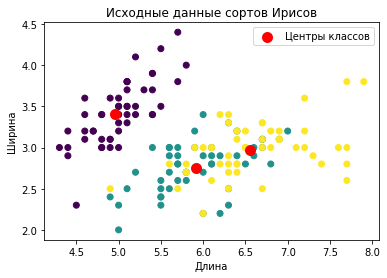

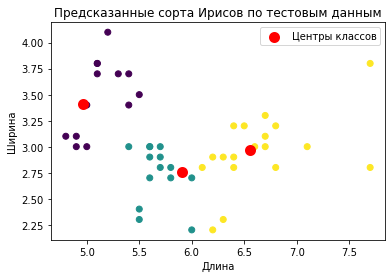

In [3]:
from sklearn.model_selection import train_test_split # Метотод разделения выборки на тренировочную и тестовую 
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis # LDA (Алгоритм линейного дискриминационного анализа)

# Определяем две переменные
X = df_iris[['sepal_length', 'sepal_width']] 
# Определяем значение функции от переменных Х
Y = df_iris['variety']

# Разделяем данные на тренировучную и тестовую
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3)
# Создаем LDA модель
model_lda = LinearDiscriminantAnalysis()
# Обучаем модель на тренировочных данных
model_lda.fit(X_train, Y_train)

def origin_graph(X_, Y_, means_, str_ = ''):
    #Визуализация данных
    plt.scatter(X_['sepal_length'], X_['sepal_width'], c = Y_)
    plt.scatter(means_[:, 0], means_[:, 1], c='r', linewidth = 5, label = f'Центры классов')
    plt.title(str_)
    plt.xlabel('Длина')
    plt.ylabel('Ширина')
    plt.legend(loc="best")
    plt.show()
#----

origin_graph(X, Y, model_lda.means_, 'Исходные данные сортов Ирисов')

origin_graph(X_test, model_lda.predict(X_test), model_lda.means_,  
             'Предсказанные сорта Ирисов по тестовым данным')

##### 6. Отбросьте целевую переменную и оставьте только два признака - sepal_length и sepal_width
##### 7. Подберите оптимальное число кластеров для алгоритма kmeans и визуализируйте полученную кластеризацию

Максимальная разница инерций 72.0, что соответствует локтю №2 со значением 58.0
Округленное значение всех инерций: [130.0, 58.0, 37.0, 28.0, 21.0, 17.0, 15.0, 13.0, 11.0, 10.0]


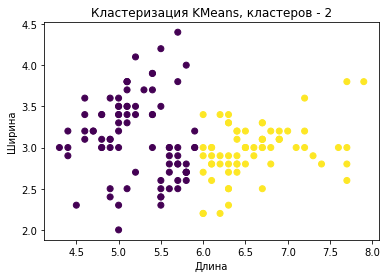

In [4]:
from sklearn.cluster import KMeans

# создаем список для инерции
kmeans_inertia = []
# задаем диапазон кластеров
k_optimum = range(1, 11)

for item in k_optimum:
    kmeans   = KMeans(n_clusters=item)
    Y_clusters = kmeans.fit_predict(X)
    # добавляем инерцию каждой модели в список
    kmeans_inertia.append(round(kmeans.inertia_, 0))

# Определяем максимальное значение разницы между 2-мя последовательными инерциями
kmeans_inertia_tmp = kmeans_inertia.copy()
kmeans_inertia_tmp.append(kmeans_inertia[-1])

# Создаем словарь {разница со следующим значением инерции : текущее значение инерции}
dict_diff = { (kmeans_inertia[id]) - val: val
                   for id, val in enumerate( kmeans_inertia_tmp[1:] ) }

max_diff_in = max( dict_diff.keys() )

n_clust = kmeans_inertia.index(dict_diff[max_diff_in]) + 1

print(f'Максимальная разница инерций {max_diff_in}, что соответствует локтю №{n_clust} со значением {dict_diff[max_diff_in]}')
print(f'Округленное значение всех инерций: {kmeans_inertia}')

kmeans     = KMeans(n_clusters = n_clust)
Y_clusters = kmeans.fit_predict(X)

#Визуализация данных
plt.scatter(X['sepal_length'], X['sepal_width'], c = Y_clusters)
plt.title(f'Кластеризация KMeans, кластеров - {n_clust}')
plt.xlabel('Длина')
plt.ylabel('Ширина')
plt.show()